In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2023-09-28 10:24:23.803739: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-28 10:24:24.540885: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-28 10:24:24.544902: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-28 10:24:26.342084: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# directly reading the dataset from Keras
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_train.shape


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (50000, 1))

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [6]:
y_train.shape


(50000, 1)

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
#reshape to get an array - from two dimensional to one dimensional
# -1 will retain the data and a blank after this and reshape will flatten the y_train
y_train = y_train.reshape(-1,)
y_train[:5]


array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
classes = ['airpplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [10]:
def plot(X, y, index):
    plt.figure(figsize=(1,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

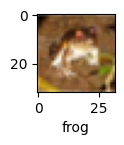

In [11]:
plot(X_train, y_train, 0)

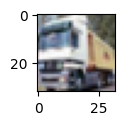

In [12]:
plt.figure(figsize=(1,2))
plt.imshow(X_train[1])

In [13]:
classes = ['airpplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [14]:
y_train[1]

9

In [15]:
X_train = X_train / 255
X_test = X_test / 255

In [16]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)), # flatten the input from two dinsion (32,32,3) into one dimension (3072)
    keras.layers.Dense(3000, activation = 'relu'), #introduce a hidden layer and in hidden layer activation function 'relu' is preferred
                                                    # let the number 3000 be less than the dimensions 3072 
    keras.layers.Dense(1000, activation = 'relu'), # one more hidden layer increases the classification better
    keras.layers.Dense(10, activation = 'sigmoid') # output layer with 10 outputs and in this layer, 
                                                   # activation function 'sigmoid' is used though others can be used
])

model.compile(optimizer = 'SGD', #SGD - Stocastic Gradient
              loss = 'sparse_categorical_crossentropy', # since the data is not one hot encoded, we are using this loss, 
              #if it is discreet we will use 'sparse_categorical_crossentropy
              metrics = ['accuracy']  
)

In [18]:
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 78s 50ms/step - loss: 1.8106 - accuracy: 0.3568
Epoch 2/5
1563/1563 [==============================] - 78s 50ms/step - loss: 1.6223 - accuracy: 0.4290
Epoch 3/5
1563/1563 [==============================] - 78s 50ms/step - loss: 1.5431 - accuracy: 0.4544
Epoch 4/5
1563/1563 [==============================] - 87s 55ms/step - loss: 1.4812 - accuracy: 0.4757
Epoch 5/5
1563/1563 [==============================] - 87s 56ms/step - loss: 1.4310 - accuracy: 0.4961


In [19]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.4706 - accuracy: 0.4752


[1.4705767631530762, 0.47519999742507935]

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [21]:
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('classification report: \n', classification_report(y_test, y_pred_classes))


313/313 [==============================] - 3s 9ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.46      0.54      0.50      1000
           1       0.64      0.53      0.58      1000
           2       0.39      0.33      0.36      1000
           3       0.35      0.30      0.32      1000
           4       0.44      0.37      0.40      1000
           5       0.58      0.20      0.30      1000
           6       0.41      0.74      0.52      1000
           7       0.59      0.52      0.55      1000
           8       0.45      0.76      0.57      1000
           9       0.61      0.46      0.52      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.46     10000
weighted avg       0.49      0.48      0.46     10000



In [26]:
from tensorflow.keras import layers

cnn = keras.Sequential([
    # cnn
    layers.Conv2D(filters = 32, kernel_size=(3, 3), activation ='relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 32, kernel_size=(3, 3), activation ='relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),



    #Dense
    keras.layers.Flatten(), # flatten the input from two dinsion (32,32,3) into one dimension (3072)
    keras.layers.Dense(3000, activation = 'relu'), #introduce a hidden layer and in hidden layer activation function 'relu' is preferred
                                                    # let the number 3000 be less than the dimensions 3072 

    keras.layers.Dense(10, activation = 'softmax') # output layer with 10 outputs and in this layer, 
                                                   # activation function 'sigmoid' is used though others can be used
])

In [27]:
cnn.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', # since the data is not one hot encoded, we are using this loss, 
              #if it is discreet we will use 'sparse_categorical_crossentropy
              metrics = ['accuracy']  
)

In [28]:
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 101s 64ms/step - loss: 1.3740 - accuracy: 0.5050
Epoch 2/10
1563/1563 [==============================] - 96s 61ms/step - loss: 1.0006 - accuracy: 0.6477
Epoch 3/10
1563/1563 [==============================] - 96s 61ms/step - loss: 0.7975 - accuracy: 0.7225
Epoch 4/10
1563/1563 [==============================] - 96s 61ms/step - loss: 0.6022 - accuracy: 0.7913
Epoch 5/10
1563/1563 [==============================] - 96s 61ms/step - loss: 0.4103 - accuracy: 0.8583
Epoch 6/10
1563/1563 [==============================] - 96s 61ms/step - loss: 0.2532 - accuracy: 0.9155
Epoch 7/10
1563/1563 [==============================] - 98s 63ms/step - loss: 0.1578 - accuracy: 0.9475
Epoch 8/10
1563/1563 [==============================] - 96s 62ms/step - loss: 0.1240 - accuracy: 0.9596
Epoch 9/10
1563/1563 [==============================] - 96s 62ms/step - loss: 0.1094 - accuracy: 0.9637
Epoch 10/10
1563/1563 [==============================] - 96s 62

In [29]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.8578 - accuracy: 0.6854


[1.857798457145691, 0.6854000091552734]

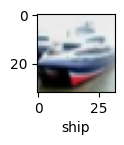

In [33]:
# convert two dimensional array into one dimensional array
y_test = y_test.reshape(-1,)
plot(X_test, y_test, 1)

In [34]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 2s 6ms/step


In [35]:
y_pred[:5]

array([[1.2717673e-03, 3.0072028e-06, 1.7588382e-04, 7.7782758e-02,
        7.0791802e-04, 9.1875243e-01, 9.0851326e-04, 9.5113312e-05,
        3.0244308e-04, 2.1522241e-07],
       [1.4495681e-02, 7.1124010e-02, 3.0477701e-13, 3.9722072e-13,
        1.0050704e-14, 9.8306538e-16, 1.0429179e-13, 1.4857281e-12,
        9.1437984e-01, 3.9685540e-07],
       [1.1241689e-02, 2.0957428e-01, 5.0483158e-07, 1.6672228e-08,
        2.1007866e-06, 7.4519349e-08, 3.5472419e-07, 1.3789692e-04,
        7.7903670e-01, 6.4406863e-06],
       [9.9989074e-01, 1.1889654e-06, 2.5605304e-06, 4.4262021e-09,
        9.1455415e-10, 1.5196244e-13, 1.1886258e-11, 9.4727134e-13,
        1.0546366e-04, 1.2734319e-08],
       [9.9039645e-11, 4.4514724e-08, 1.7810690e-03, 2.8916440e-04,
        7.2425050e-01, 6.4338878e-02, 2.0933893e-01, 1.9600314e-08,
        1.2954437e-06, 5.8965117e-08]], dtype=float32)

In [36]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[5, 8, 8, 0, 4]

In [37]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [39]:
print('classification report \n',classification_report(y_test, y_classes))

classification report 
               precision    recall  f1-score   support

           0       0.65      0.83      0.73      1000
           1       0.80      0.81      0.81      1000
           2       0.59      0.58      0.59      1000
           3       0.52      0.45      0.48      1000
           4       0.65      0.62      0.64      1000
           5       0.61      0.56      0.58      1000
           6       0.68      0.82      0.75      1000
           7       0.69      0.76      0.72      1000
           8       0.86      0.73      0.79      1000
           9       0.80      0.69      0.74      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.68     10000
weighted avg       0.69      0.69      0.68     10000

